In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import tensorflow
from tensorflow import keras


#### loading the dataset

In [2]:
url='C:/Users/user/Desktop/data_science_project/first_project/archive (1)/netflix_titles.csv'

In [3]:
netflix_dataset=pd.read_csv(url)


### cleaning the dataset

In [4]:
netflix_dataset.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix_dataset=netflix_dataset.dropna()

In [6]:
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']


In [7]:
netflix_tv_shows=netflix_dataset.drop(netflix_movies.index)


In [8]:
import seaborn as sns
netflix_tv_shows.shape

(147, 12)

In [9]:
countries=netflix_dataset['country'].unique()

In [10]:
netflix_movies["release_year"].unique()

array([1993, 2021, 1998, 2010, 2013, 2017, 1975, 1978, 1983, 1987, 2012,
       2001, 2002, 2003, 2004, 2011, 2008, 2009, 2007, 2005, 2006, 2018,
       2020, 2019, 1994, 2015, 1982, 1989, 2014, 1990, 1991, 1999, 2016,
       1986, 1996, 1984, 1997, 1980, 1961, 1995, 1985, 1992, 2000, 1976,
       1959, 1988, 1972, 1981, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1955, 1942, 1947, 1944], dtype=int64)

#### VISUALIZE MOVIES DATA SET

##### task 1: which year were watched most

In [11]:
netflix_movies['count']=1

C:\Users\user\AppData\Local\Temp\ipykernel_12560\2264823945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['count']=1


In [12]:
release_year_movies=netflix_movies.groupby('release_year')['count'].sum().reset_index()[['release_year', 'count']]
release_year_movies

,release_year,count
0,1942,1
1,1944,1
2,1945,1
3,1946,1
4,1947,1
...,...,...
67,2017,640
68,2018,632
69,2019,495
70,2020,409


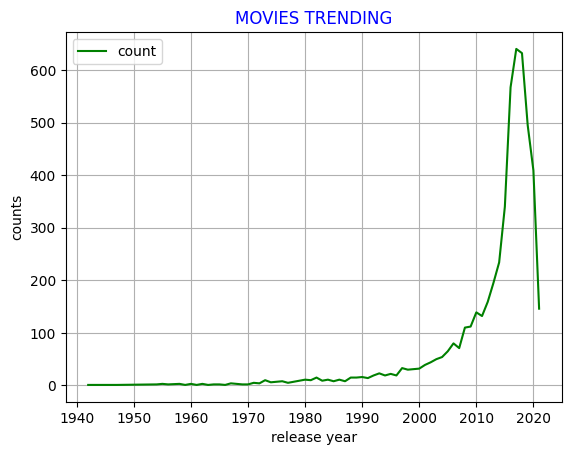

In [13]:
release_year_movies.plot('release_year', 'count',color='g')
plt.xlabel('release year')
plt.ylabel('counts')
plt.title('MOVIES TRENDING', c='b')
plt.grid()
plt.show()


##### task2: the longest movie name


index_of_longest = netflix_movies['title'].str.len().idxmax()
longest_movie_name=netflix_movies['title'][index_of_longest]
longest_movie_name

In [14]:
duplicates=netflix_movies.groupby('director')['count'].sum()
duplicates.idxmax()



'Raúl Campos, Jan Suter'

##### task4: movies that span for long

In [15]:
def get_min(time):
    return pd.to_numeric(time.split(' ')[0])
netflix_movies['duration']=netflix_movies['duration'].apply(lambda x:get_min(x) )

C:\Users\user\AppData\Local\Temp\ipykernel_12560\3429653847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration']=netflix_movies['duration'].apply(lambda x:get_min(x) )


In [16]:
netflix_movies['duration'].max()

253

In [17]:
ratings=netflix_movies.groupby(['title','rating'])['count'].sum()

##### task 5: which country watches the movies most

In [18]:

netflix_movies_country=netflix_movies[['country']]

In [19]:
country_dict={}

for k, v in netflix_movies_country.iterrows():
    country_rows=v['country']
    country_split=country_rows.split(", ")
    for name in country_split:
        country_dict[name]=country_dict.get(name, 0)+1
sort=sorted(country_dict.items(), key=lambda x:x[1], reverse=True)
sort

[('United States', 2444),
 ('India', 932),
 ('United Kingdom', 461),
 ('Canada', 287),
 ('France', 285),
 ('Germany', 165),
 ('Spain', 152),
 ('Japan', 113),
 ('China', 107),
 ('Egypt', 99),
 ('Hong Kong', 98),
 ('Mexico', 97),
 ('Nigeria', 92),
 ('Indonesia', 84),
 ('Australia', 83),
 ('Turkey', 81),
 ('Philippines', 79),
 ('Belgium', 73),
 ('Argentina', 64),
 ('Italy', 60),
 ('Brazil', 56),
 ('South Korea', 56),
 ('South Africa', 47),
 ('Thailand', 43),
 ('Netherlands', 35),
 ('United Arab Emirates', 34),
 ('Poland', 30),
 ('Ireland', 29),
 ('Denmark', 25),
 ('Sweden', 25),
 ('Chile', 24),
 ('New Zealand', 22),
 ('Lebanon', 22),
 ('Norway', 19),
 ('Pakistan', 19),
 ('Switzerland', 18),
 ('Singapore', 18),
 ('Malaysia', 18),
 ('Taiwan', 18),
 ('Colombia', 17),
 ('Israel', 16),
 ('Czech Republic', 15),
 ('Romania', 13),
 ('Bulgaria', 10),
 ('Hungary', 10),
 ('Luxembourg', 10),
 ('Uruguay', 10),
 ('Saudi Arabia', 9),
 ('Qatar', 9),
 ('Austria', 9),
 ('Russia', 9),
 ('Iceland', 8),
 ('Pe

In [20]:
max_pair = max(country_dict.items(), key=lambda x: x[1])

In [21]:
key, value=max_pair

In [22]:
key, value

('United States', 2444)

##### task #6: which platform post high number of movies

In [23]:
post_dict={}
for x, w in netflix_movies[['listed_in']].iterrows():
        rows=w['listed_in']
        splitted_rows=rows.split(",")
        stripped_rows=[i.strip(" ").lower()  for i in splitted_rows]
        for x in splitted_rows:
            post_dict[x]=post_dict.get(x, 0)+1
sorted_post_dict=sorted(post_dict.items(), key=lambda x :x[1], reverse=True)
sorted_post_dict_max=max(post_dict.items(), key=lambda x:x[1])
sorted_post_dict_max


####from the data international movies host the highest number of movies


(' International Movies', 2260)

##### task:7 in which year movies were mostly added

In [24]:
netflix_movies['new_year']=pd.to_datetime(netflix_movies['date_added'])
netflix_movies['year']=netflix_movies['new_year'].dt.year
netflix_movies_year=netflix_movies.groupby('year')['count'].sum().reset_index()[['year', 'count']]

C:\Users\user\AppData\Local\Temp\ipykernel_12560\332606549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['new_year']=pd.to_datetime(netflix_movies['date_added'])
C:\Users\user\AppData\Local\Temp\ipykernel_12560\332606549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['year']=netflix_movies['new_year'].dt.year


In [25]:
netflix_movies_year.sort_values('count', ascending=False)


,year,count
11,2019,1236
12,2020,1151
10,2018,1085
13,2021,729
9,2017,702
8,2016,195
7,2015,47
6,2014,14
3,2011,13
5,2013,6


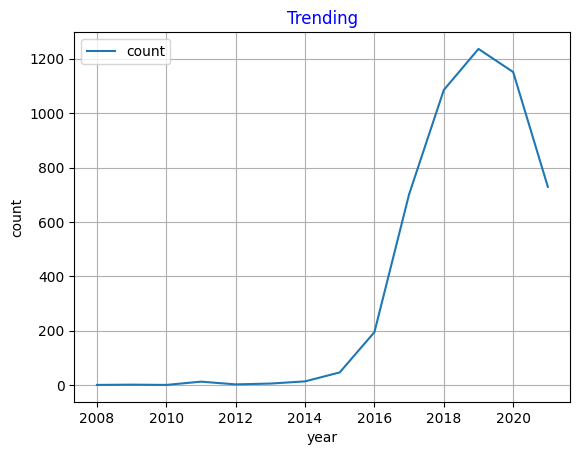

In [26]:
netflix_movies_year.plot('year', 'count')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Trending', c='b')
plt.grid()
plt.show()

In [27]:
netflix_movies['month']=netflix_movies['new_year'].dt.month
netflix_movies_month=netflix_movies.groupby('month')['count'].sum().reset_index()[['month', 'count']]

C:\Users\user\AppData\Local\Temp\ipykernel_12560\1384777820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['month']=netflix_movies['new_year'].dt.month


In [28]:
netflix_movies_month.sort_values('month')

,month,count
0,1,478
1,2,327
2,3,454
3,4,460
4,5,357
5,6,403
6,7,451
7,8,434
8,9,416
9,10,480


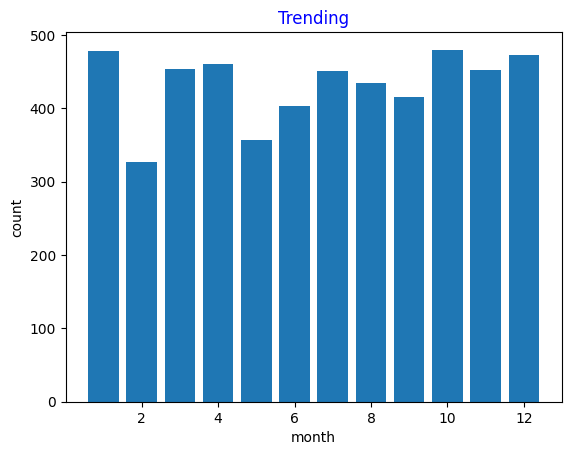

In [29]:
plt.bar(netflix_movies_month['month'],netflix_movies_month['count'] )
plt.xlabel('month')
plt.ylabel('count')
plt.title('Trending', c='b')
plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras import layers
from imblearn.over_sampling import RandomOverSampler

In [46]:
movies_tv_shows={'Movie':1,'TV Show':0 }
netflix_dataset["type"]=netflix_dataset["type"].map(movies_tv_shows)

In [32]:
####spliting the netflix_dataset

In [47]:
train, valid , test=np.split(netflix_dataset.sample (frac=1), [int(0.6*len(netflix_dataset)), int(0.6*len(netflix_dataset))])

In [48]:

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop('type')
    df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        ds = ds.batch(batch_size)
        ds=ds.prefetch(batch_size)
        return ds
    

In [35]:

df_model =df_to_dataset(train, shuffle=True )

C:\Users\user\AppData\Local\Temp\ipykernel_12560\3757225836.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [36]:
[(train_features, label_batch)] = df_model.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', np.reshape(train_features['duration'], (-1)))
print('A batch of targets:', label_batch )

Every feature: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
A batch of ages: [b'77 min' b'97 min' b'1 Season' b'97 min' b'71 min' b'119 min' b'102 min'
 b'96 min' b'97 min' b'101 min' b'1 Season' b'91 min' b'62 min' b'102 min'
 b'115 min' b'137 min' b'149 min' b'112 min' b'149 min' b'86 min'
 b'124 min' b'115 min' b'83 min' b'107 min' b'113 min' b'75 min' b'68 min'
 b'154 min' b'113 min' b'138 min' b'106 min' b'70 min']
A batch of targets: tf.Tensor([1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int64)


In [37]:
def get_normalization_layer(name, dataset):
    normalizer = layers.Normalization(axis=None)
    feature_ds = dataset.map(lambda x, y: x[name])
    normalizer.adapt(feature_ds)
    return normalizer

In [38]:
normalizer_layer=train['type']
layer =get_normalization_layer('type', df_model)
layer(normalizer_layer)



<tf.Tensor: shape=(1, 3199), dtype=float32, numpy=
array([[0.17399324, 0.17399324, 0.17399324, ..., 0.17399324, 0.17399324,
        0.17399324]], dtype=float32)>

In [39]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
    if dtype == 'string':
        index = layers.StringLookup(max_tokens=max_tokens)
    else:
        index = layers.IntegerLookup(max_tokens=max_tokens)

    feature_ds = dataset.map(lambda x, y: x[name])

    index.adapt(feature_ds)
    encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

    return lambda feature: encoder(index(feature))


In [40]:
test_category=train['duration']
test_layer =get_category_encoding_layer(name='duration',
                                              dataset=df_model,
                                              dtype='string')
test_layer(test_category)

<tf.Tensor: shape=(182,), dtype=float32, numpy=
array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [41]:
netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [49]:
batch_size=256
train =df_to_dataset(train, batch_size=batch_size)
valid =df_to_dataset(valid, batch_size=batch_size, shuffle=False)
test =df_to_dataset(test, batch_size=batch_size, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_12560\3757225836.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
C:\Users\user\AppData\Local\Temp\ipykernel_12560\3757225836.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [100]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['type', 'release_year']:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, df_model)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [102]:
for header in netflix_dataset.columns.drop(['type','release_year']):
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=df_model,
                                               dtype='string',
                                               max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_col)
    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

In [104]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)



In [105]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [117]:
model.fit(df_model, epochs=10)

Epoch 1/10
100/100 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 6/10
100/100 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.0294
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 8/10
100/100 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.0294
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294
Epoch 10/10
100/100 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0294


In [120]:
loss, accuracy = model.evaluate(df_model)
print("Accuracy", accuracy)

100/100 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0294
Accuracy 0.029384182766079903
